In [ ]:
#Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Carregar o dataset
df = pd.read_csv("coffee_dataset.csv")

#mostrar as primeiras linhas
df.head()


,farm_id,year,variety,altitude_m,avg_temp_C,precip_mm,fertilizer_kg_ha,irrigation,pruning_score,pest_incidence,prev_yield_sacas_ha,yield_sacas_ha
0,7,2024,Bourbon,1263.0,16.52,1532.0,98.6,1,0.52,0.34,38.41,47.70
1,20,2022,Icatu,1212.0,19.25,880.0,302.5,0,0.67,0.00,38.89,47.17
2,29,2024,Catuai,1382.0,17.07,1075.0,303.9,0,0.66,0.06,34.27,40.76
3,15,2020,Icatu,1194.0,18.05,1242.0,336.6,0,0.73,0.12,51.49,61.81
4,11,2022,Catuai,813.0,19.25,302.0,96.4,0,0.28,0.00,29.14,18.27


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   farm_id              200 non-null    int64  
 1   year                 200 non-null    int64  
 2   variety              200 non-null    object 
 3   altitude_m           200 non-null    float64
 4   avg_temp_C           200 non-null    float64
 5   precip_mm            200 non-null    float64
 6   fertilizer_kg_ha     200 non-null    float64
 7   irrigation           200 non-null    int64  
 8   pruning_score        200 non-null    float64
 9   pest_incidence       200 non-null    float64
 10  prev_yield_sacas_ha  200 non-null    float64
 11  yield_sacas_ha       200 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 18.9+ KB
None

Resumo estatístico:
          farm_id         year  altitude_m  avg_temp_C    precip_mm  \
count  200.

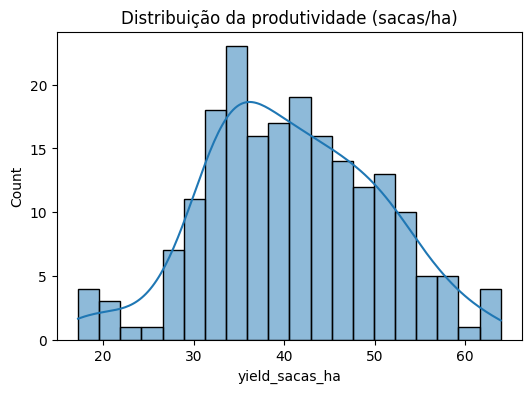

ValueError: could not convert string to float: 'Bourbon'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Análise exploratória rápida
print("Informações do dataset:")
print(df.info())

print("\nResumo estatístico:")
print(df.describe())

# Histograma de produtividade
plt.figure(figsize=(6,4))
sns.histplot(df['yield_sacas_ha'], bins=20, kde=True)
plt.title("Distribuição da produtividade (sacas/ha)")
plt.show()

# Mapa de calor das correlações
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlação entre variáveis")
plt.show()


In [ ]:
# Separar variáveis de entrada (X) e saída (y)
X = df.drop(columns=["yield_sacas_ha"])
y = df["yield_sacas_ha"]

# Converter variáveis categóricas (variety) em dummies
X = pd.get_dummies(X, drop_first=True)

X.head()


,farm_id,year,altitude_m,avg_temp_C,precip_mm,fertilizer_kg_ha,irrigation,pruning_score,pest_incidence,prev_yield_sacas_ha,variety_Catuai,variety_Icatu,variety_Mundo Novo
0,7,2024,1263.0,16.52,1532.0,98.6,1,0.52,0.34,38.41,False,False,False
1,20,2022,1212.0,19.25,880.0,302.5,0,0.67,0.00,38.89,False,True,False
2,29,2024,1382.0,17.07,1075.0,303.9,0,0.66,0.06,34.27,True,False,False
3,15,2020,1194.0,18.05,1242.0,336.6,0,0.73,0.12,51.49,False,True,False
4,11,2022,813.0,19.25,302.0,96.4,0,0.28,0.00,29.14,True,False,False


In [ ]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Cria e treina o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)


In [ ]:
# Avaliar o modelo
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE (quanto o modelo erra em média): {rmse:.2f} sacas/ha")
print(f"R² (qualidade da previsão): {r2:.2f}")


RMSE (quanto o modelo erra em média): 4.75 sacas/ha
R² (qualidade da previsão): 0.73


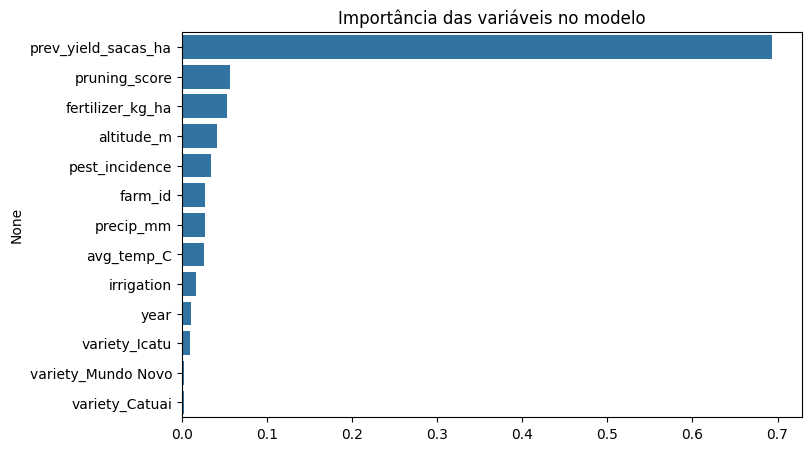

In [ ]:
#relevância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importância das variáveis no modelo")
plt.show()


In [ ]:
# testar previsão com novos dados
# Exemplo: um talhão com certas condições
novo_dado = pd.DataFrame([{
    "farm_id": 1,
    "year": 2024,
    "altitude_m": 1200,
    "avg_temp_C": 20.5,
    "precip_mm": 1100,
    "fertilizer_kg_ha": 200,
    "irrigation": 1,
    "pruning_score": 0.8,
    "pest_incidence": 0.2,
    "prev_yield_sacas_ha": 35,
    "variety_Catuai": 0,
    "variety_Icatu": 1,
    "variety_Mundo Novo": 0
}])

# previsao = model.predict(novo_dado)[0]
# print(f"Previsão de produtividade: {previsao:.2f} sacas/ha")

prod, dicas = agente_ia(novo_dado, model)

print(f"Produtividade prevista: {prod:.2f} sacas/ha")
print("Sugestões para o agricultor:")
for dica in dicas:
    print(f"- {dica}")


Produtividade prevista: 42.04 sacas/ha
Sugestões para o agricultor:


In [26]:
def agente_ia(novo_dado, modelo, meta_producao=40):
    # Faz a previsão usando o modelo
    previsao = modelo.predict(novo_dado)[0]
    
    # Lista para armazenar sugestões
    sugestoes = []

    # Regras simples para gerar sugestões
    if novo_dado['pest_incidence'].values[0] > 0.3:
        sugestoes.append("Alta incidência de pragas! Reforce o controle fitossanitário.")
    
    if novo_dado['precip_mm'].values[0] < 900:
        sugestoes.append("Pouca chuva registrada. Considere irrigação para a cultura.")
    
    if previsao < meta_producao:
        sugestoes.append("Produtividade prevista abaixo da meta. Verifique manejo e condições gerais da lavoura.")

    # Retorna a previsão e as sugestões
    return previsao, sugestoes

# --- Aqui fora da função, no nível principal do código ---

novo_dado = pd.DataFrame([{
    "farm_id": 1,
    "year": 2024,
    "altitude_m": 1200,
    "avg_temp_C": 20.5,
    "precip_mm": 800,
    "fertilizer_kg_ha": 200,
    "irrigation": 1,
    "pruning_score": 0.8,
    "pest_incidence": 0.5,  # Está abaixo do limite 0.3, por isso não aparece sugestão de pragas
    "prev_yield_sacas_ha": 35,
    "variety_Catuai": 0,
    "variety_Icatu": 1,
    "variety_Mundo Novo": 0
}])

prod, dicas = agente_ia(novo_dado, model)

print(f"Produtividade prevista: {prod:.2f} sacas/ha")
print("Sugestões para o agricultor:")
if len(dicas) == 0:
    print("- Nenhuma sugestão necessária, condições adequadas!")
else:
    for dica in dicas:
        print(f"- {dica}")


Produtividade prevista: 41.85 sacas/ha
Sugestões para o agricultor:
- Alta incidência de pragas! Reforce o controle fitossanitário.
- Pouca chuva registrada. Considere irrigação para a cultura.


In [27]:
import pickle

with open("modelo_cafe.pkl", "wb") as f:
    pickle.dump(model, f)